<a href="https://colab.research.google.com/github/RostislavKorst/Generative-Models-2024/blob/main/Assignment%201/1_gan_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Models

***



**Autumn 2024**


The assignment is split into two parts: at first, you will implement classical GAN for the MNIST dataset, and after, you will enhance your results with DCGAN and the CIFAR dataset.



Good luck!

## 2. DCGAN

*Source: <a href="https://arxiv.org/pdf/1511.06434v2.pdf" target="_blank">Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015)</a>.*

The goal of this part is to enhance your results achieved in the part one with DCGAN. Feel free to reuse your code, improve architecture or training scheme, etc.

In [10]:
class CFG:

    batch_size = 128

    num_epochs = 300

    workers = 4

    seed = 2021

    image_size = 64

    download = True

    dataroot = "data"

    nc = 3  ## number of chanels

    ngf = 64  # Size of feature maps in generator

    nz = 100  # latent random input vector

    ndf = 64  # Size of feature maps in discriminator

    lr = 0.0002

    device = "cuda" if torch.cuda.is_available() else "cpu"

    sample_dir = "./images/"





if not os.path.exists(CFG.sample_dir):

    os.makedirs(CFG.sample_dir)



cifar_dataset = CIFAR10(

    root=CFG.dataroot,

    download=CFG.download,

    transform=transforms.Compose(

        [

            transforms.Resize([CFG.image_size, CFG.image_size]),

            transforms.ToTensor(),

            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

        ]

    ),

)

Files already downloaded and verified


Label:  4


(array([ 168.,  626., 1813., 2256., 2393., 2236., 1167.,  610.,  345.,
         155.,  119.,  123.,  131.,   70.,   76.]),
 array([-9.29411769e-01, -8.13333333e-01, -6.97254896e-01, -5.81176519e-01,
        -4.65098053e-01, -3.49019647e-01, -2.32941210e-01, -1.16862774e-01,
        -7.84337521e-04,  1.15294099e-01,  2.31372476e-01,  3.47450972e-01,
         4.63529348e-01,  5.79607844e-01,  6.95686221e-01,  8.11764717e-01]),
 <BarContainer object of 15 artists>)

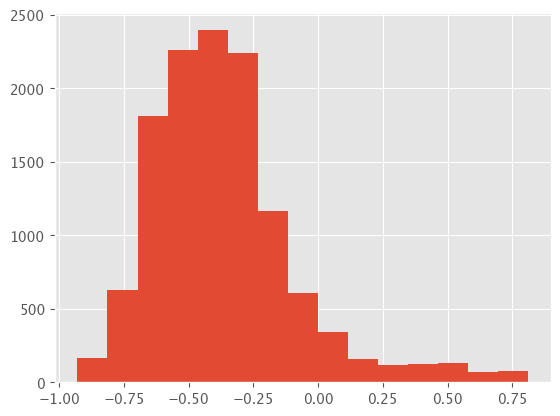

In [11]:
img, label = cifar_dataset[3]

print("Label: ", label)

plt.hist(img[:, :, :].flatten(), bins=15)

In [ ]:
# unnormalization image from range (-1)-1 to range 0-1 to display it

def denorm(img):
    return (img + 1) / 2
надею
# show  image sample with matplotlib

print(img.shape)

deimg = denorm(img)


torch.Size([3, 64, 64])


In [ ]:
def denorm1(img):

    # write your code

    return (img + 1) / 2

deimg1 = denorm1(img)

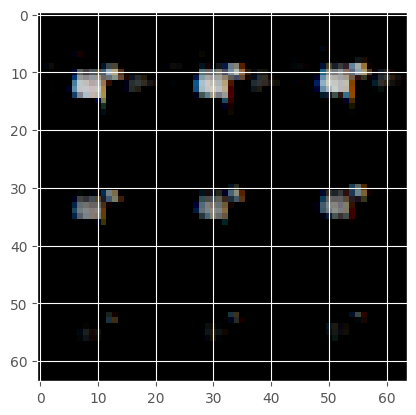

In [ ]:
deimg1 = deimg1.reshape(64, 64, 3)

img = img.reshape(64, 64, 3)



plt.imshow(img)

Label:  4


(array([ 168.,  626., 1813., 2256., 2393., 2236., 1167.,  610.,  345.,
         155.,  119.,  123.,  131.,   70.,   76.]),
 array([0.03529412, 0.09333333, 0.15137255, 0.20941176, 0.26745099,
        0.32549018, 0.38352939, 0.44156861, 0.49960783, 0.55764705,
        0.61568624, 0.67372549, 0.73176467, 0.78980392, 0.84784311,
        0.90588236]),
 <BarContainer object of 15 artists>)

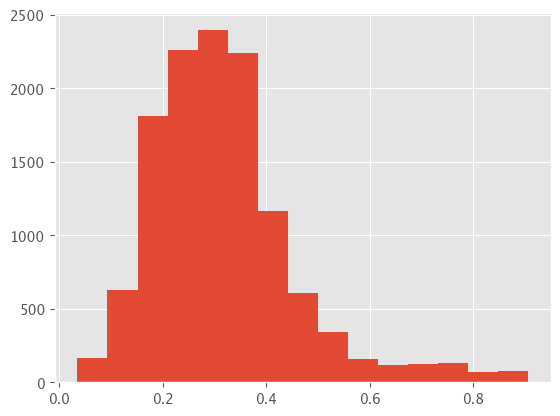

In [14]:
print("Label: ", label)

plt.hist(deimg[:, :, :].flatten(), bins=15)

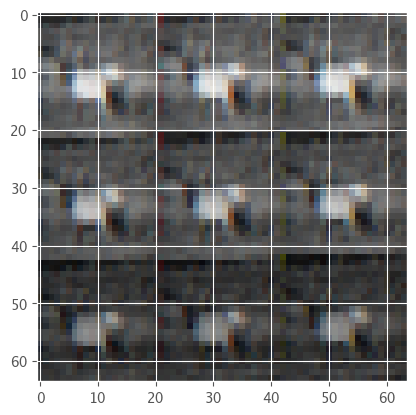

In [15]:
deimg = deimg.reshape(64, 64, 3)

img = img.reshape(64, 64, 3)



plt.imshow(deimg)

In [ ]:
# create the dataloader

data_loader = DataLoader(cifar_dataset, batch_size=CFG.batch_size, shuffle=True)

for data, targets in dataloader:

    print(data.shape)

### DCGAN implementation

In [ ]:
class CFG:

    batch_size = 128

    num_epochs = 40

    workers = 4

    seed = 2021

    image_size = 64

    download = True

    dataroot = "data"

    nc = 3  ## number of chanels

    ngf = 64  # Size of feature maps in generator

    nz = 100  # latent random input vector

    ndf = 64  # Size of feature maps in discriminator

    lr = 0.0002

    device = "cuda" if torch.cuda.is_available() else "cpu"

    sample_dir = "./images/"



class DCGenerator(nn.Module):

    def __init__(self, nc, nz, ngf):

        # ConvTranspose2d - BatchNorm - Relu -ConvTranspose2d - BatchNorm - Relu -ConvTranspose2d - BatchNorm - Relu

        # ConvTranspose2d - BatchNorm - Relu - ConvTranspose2d - Tanh

        super(DCGenerator, self).__init__()

        self.blocks = nn.Sequential(
            nn.ConvTranspose2d(in_channels=nz, out_channels=ngf * 16, kernel_size=(4, 4), stride=1, padding=0, bias=False),
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(0.2),
            
            nn.ConvTranspose2d(in_channels=ngf * 16, out_channels=ngf * 8, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(0.2),
            
            nn.ConvTranspose2d(in_channels=ngf * 8, out_channels=ngf * 4, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(0.2),

            nn.ConvTranspose2d(in_channels=ngf * 4, out_channels=ngf * 2, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(0.2),
            
            nn.ConvTranspose2d(in_channels=ngf * 2, out_channels=ngf, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(0.2),
            
            nn.Conv2d(in_channels=ngf, out_channels=nc, kernel_size=(3, 3), padding=1),
            nn.Tanh()
        )



    def forward(self, x):

        x = x.view(x.shape[0], x.shape[1], 1, 1)

        x = self.blocks(x)

        return x



class DCDiscriminator(nn.Module):

    def __init__(self, nc, ndf):

        # conv2d - leaky - conv2d - batchnorm - leaky - conv2d - batchnorm - leaky - conv - batchnorm - leaky - conv2d

        super(DCDiscriminator, self).__init__()

        self.blocks = nn.Sequential(

            nn.Conv2d(in_channels=nc, out_channels=ndf, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2),

            nn.Conv2d(in_channels=ndf, out_channels=ndf * 2, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),

            nn.Conv2d(in_channels=ndf * 2, out_channels=ndf * 4, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),

            nn.Conv2d(in_channels=ndf * 4, out_channels=ndf * 8, kernel_size=(4, 4), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5),

            nn.Conv2d(in_channels=ndf * 8, out_channels=1, kernel_size=(4, 4), padding=0, bias=False),
            nn.Sigmoid()
        )



    def forward(self, x):

        ##

        x = self.blocks(x)

        return x.view(x.shape[0], 1)

In [ ]:
# create new Generator model
DCG = DCGenerator(CFG.nc, CFG.nz, CFG.ngf)

# create new Discriminator model
DCD = DCDiscriminator(CFG.nc, CFG.ndf)

In [ ]:
# show the output of model
y = DCG(torch.randn(2, CFG.nz))

torch.Size([2, 3, 64, 64])
torch.Size([2, 1])


In [ ]:
# define the criterion is nn.BCELoss()
criterion = nn.BCELoss()

## Define the optimizer for generator and discrimator
def optimazer(O, LR = 0.0002):

    optimizer = optim.Adam(O.parameters(), lr=LR)



    return optimizer



G_optimizer = optimazer(DCG)

D_optimizer = optimazer(DCD, LR = .00016)

In [ ]:
# feel free to reuse your training functions

def reset_grad(optimizer):

    ## reset gradient for optimizer of generator and discrimator

    optimizer.zero_grad()

    

    return optimizer



def train_discriminator(D_model, G_model, images, D_optimizer):

    # Create the labels which are later used as input for the BCE loss

    real_labels = torch.ones(images.shape[0], 1).to(device)

    fake_labels = torch.zeros(images.shape[0], 1).to(device)

    outputs = D_model(images)

    # Loss for real images

    real_score = outputs

    real_loss = criterion(real_score, real_labels)



    # Loss for fake images

    z = torch.randn(images.shape[0], CFG.nz).to(device)

    fake_images = G_model(z)

    outputs = D_model(fake_images)



    fake_score = outputs

    fake_loss = criterion(fake_score, fake_labels)



    # Sum losses

    d_loss = real_loss + fake_loss



    # Reset gradients

    D_optimizer.zero_grad()



    # Compute gradients

    d_loss.backward()



    # Adjust the parameters using backprop

    D_optimizer.step()



    return d_loss, real_score, fake_score



def train_generator(G_model, D_model, G_optimizer):

    # Generate fake images and calculate loss

    # z = torch.randn(batch_size, latent_size).to(device)

    z = torch.randn(CFG.batch_size, CFG.nz).to(device)

    fake_images = G_model(z)

    

    labels = torch.ones(CFG.batch_size, 1).to(device)

    # calculate the generator loss

    g_loss = criterion(D_model(fake_images), labels)



    # Reset gradients

    G_optimizer.zero_grad()



    # Backprop and optimize

    g_loss.backward()



    G_optimizer.step()



    return g_loss, fake_images


### Start the training proccess

In [16]:
def save_fake_images_cifar(DCG_model, index):

    sample_vectors = torch.randn(CFG.batch_size, CFG.nz, 1, 1).to(CFG.device)

    fake_images = DCG_model(sample_vectors)

    fake_images = fake_images.reshape(fake_images.size(0), 3, 64, 64)

    fake_fname = "fake_images-{0:0=4d}.png".format(index)

    print("Saving", fake_fname)

    save_image(

        denorm(fake_images), os.path.join(CFG.sample_dir, fake_fname), nrow=10

    )

In [34]:
%%time

device = CFG.device

num_epochs = CFG.num_epochs

batch_size = CFG.batch_size



total_step = len(dataloader)

d_losses, g_losses, real_scores, fake_scores = [], [], [], []

DCG.to(device)

DCD.to(device)



for epoch in range(num_epochs):

    for i, (images, _) in enumerate(dataloader):

        # Load a batch & transform to vectors

        images = images.to(device)

        # Train the discriminator

        d_loss, real_score, fake_score = train_discriminator(DCD, DCG, images, D_optimizer)

        # Train the generator

        g_loss, fake_images = train_generator(DCG, DCD, G_optimizer)

        

        # Inspect the losses

        if (i + 1) % 200 == 0:

            d_losses.append(d_loss.item())

            g_losses.append(g_loss.item())

            real_scores.append(real_score.mean().item())

            fake_scores.append(fake_score.mean().item())

            print(

                "Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}".format(

                    epoch,

                    num_epochs,

                    i + 1,

                    total_step,

                    d_loss.item(),

                    g_loss.item(),

                    real_score.mean().item(),

                    fake_score.mean().item(),

                )

            )

    # Sample and save images

    save_fake_images_cifar(DCG, epoch + 1)

Epoch [0/40], Step [200/391], d_loss: 1.1436, g_loss: 1.1586, D(x): 0.56, D(G(z)): 0.38
Saving fake_images-0001.png
Epoch [1/40], Step [200/391], d_loss: 1.2077, g_loss: 1.3855, D(x): 0.41, D(G(z)): 0.20
Saving fake_images-0002.png
Epoch [2/40], Step [200/391], d_loss: 1.2637, g_loss: 0.8557, D(x): 0.48, D(G(z)): 0.35
Saving fake_images-0003.png
Epoch [3/40], Step [200/391], d_loss: 0.7717, g_loss: 1.1984, D(x): 0.57, D(G(z)): 0.15
Saving fake_images-0004.png
Epoch [4/40], Step [200/391], d_loss: 0.9611, g_loss: 2.5695, D(x): 0.75, D(G(z)): 0.46
Saving fake_images-0005.png
Epoch [5/40], Step [200/391], d_loss: 1.6460, g_loss: 1.5578, D(x): 0.84, D(G(z)): 0.75
Saving fake_images-0006.png
Epoch [6/40], Step [200/391], d_loss: 1.3856, g_loss: 1.2298, D(x): 0.48, D(G(z)): 0.42
Saving fake_images-0007.png
Epoch [7/40], Step [200/391], d_loss: 1.2888, g_loss: 0.7240, D(x): 0.38, D(G(z)): 0.21
Saving fake_images-0008.png
Epoch [8/40], Step [200/391], d_loss: 1.1093, g_loss: 2.3741, D(x): 0.77

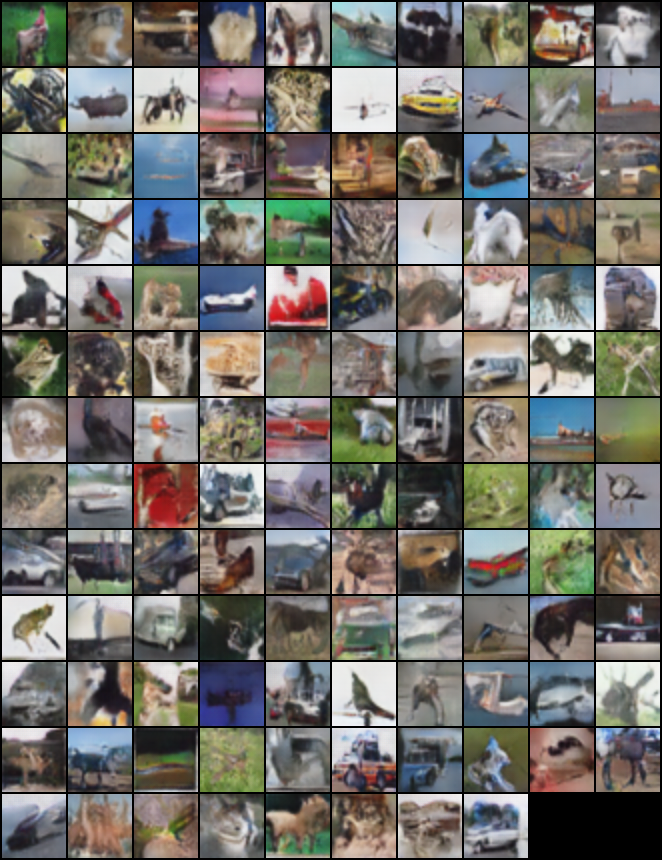

In [3]:
# show output after epochs training

Image.open("/Users/anatoli_vasileva/Desktop/CT-GANs/lab1part2/images/fake_images-0040.png")


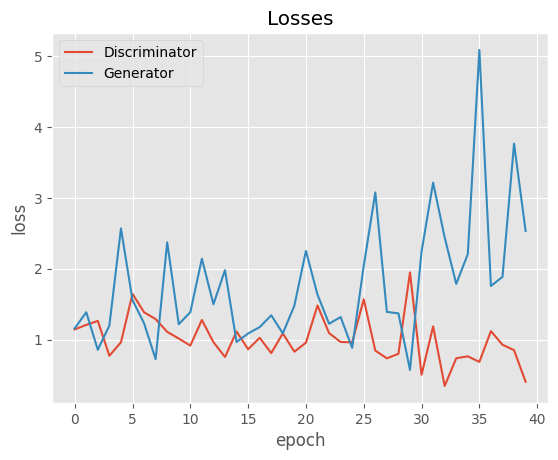

In [35]:
# show your results!
plt.plot(d_losses, "-")
plt.plot(g_losses, "-")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["Discriminator", "Generator"])
plt.title("Losses");

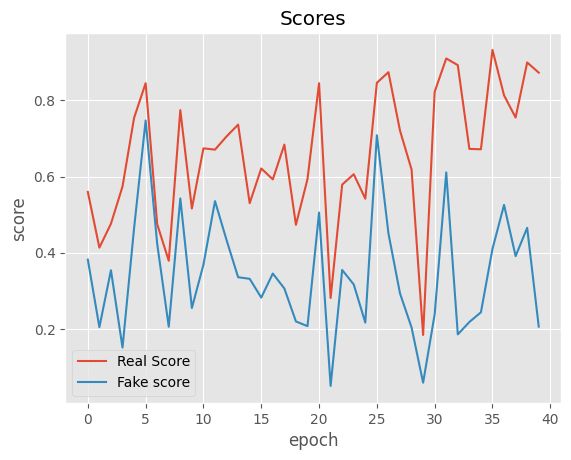

In [36]:
# plot the accuracy of discrimator
plt.plot(real_scores, "-")
plt.plot(fake_scores, "-")
plt.xlabel("epoch")
plt.ylabel("score")
plt.legend(["Real Score", "Fake score"])
plt.title("Scores");

In [ ]:
torch.save(DCG.state_dict(), 'DCgenerator.pth')
torch.save(DCD.state_dict(), 'DCdiscriminator.pth') 

In [39]:
!zip -r file.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/DCdiscriminator.pth (deflated 7%)
  adding: kaggle/working/data/ (stored 0%)
  adding: kaggle/working/data/cifar-10-batches-py/ (stored 0%)
  adding: kaggle/working/data/cifar-10-batches-py/data_batch_3 (deflated 8%)
  adding: kaggle/working/data/cifar-10-batches-py/data_batch_1 (deflated 9%)
  adding: kaggle/working/data/cifar-10-batches-py/readme.html (stored 0%)
  adding: kaggle/working/data/cifar-10-batches-py/data_batch_5 (deflated 8%)
  adding: kaggle/working/data/cifar-10-batches-py/test_batch (deflated 8%)
  adding: kaggle/working/data/cifar-10-batches-py/data_batch_2 (deflated 8%)
  adding: kaggle/working/data/cifar-10-batches-py/data_batch_4 (deflated 8%)
  adding: kaggle/working/data/cifar-10-batches-py/batches.meta (deflated 12%)
  adding: kaggle/working/data/cifar-10-python.tar.gz (deflated 0%)
  adding: kaggle/working/images/ (stored 0%)
  adding: kaggle/working/images/fake_images-0021.png (deflated 0%)
  addi